# 주제 : S&P 500 기업에 대한 Total ESG risk ratings와 주가 간의 상관관계 분석(2022년 7월 기준)
##    용어 정리
###      S&P 500 기업 / Total ESG risk ratings
+ S&P 500 기업
    - 미국의 스탠더드 앤드 푸어(Standard & Poor)사가 작성해 발표하는 주가지수.
    
+ Total ESG risk ratings
    - ESG 기업 경영, 기후협약, 투자자적 관점
    - 대표적으로 두 개의 ESG 평가기관이 제시하는 지표가 많이 쓰임 -> MSCI, Sustainanalytics (Morningstar)
    - 아직 국제적으로 하나의 통일된 기준 혹은 지표가 없음<br><br>
    - E = Environment(환경) -  기후변화, 파리협정, 플라스틱 등의 이슈<br>
      S = Social(사회) -  인권, 아동 착취, 성평등, 노동자 보호, 교육, 소비자 보호, 안전 등의 이슈<br>
      G = Governance(기업지배구조) -  공시가 중요해짐에 따라 기업의 투명성.<br>예를 들어, ESG 부서가 기업 구조적으로 기업의 결정에 실질적인 영향력을 행사할 수 있는 구조인지, 마케팅 부서에 속하며 그린워싱, ESG 워싱에 이용하는 기업인지 여부 판단.

    
    
## 주제 내용
- ESG 관련 지표가 주가와의 유의미한 상관관계가 있는가
- 상관관계가 있다면, 높은 상관관계를 가지는 기업들은 어떤 공통점이 있는가
  
## 선정 동기
- 팀원 4명 중 3명이 '주가'라는 지표에 대해 관심을 가지고 있었고, 나머지 한 명도 2순위로는 금융을 생각하고 있어 '주가' 관련 주제를 잡았다.<br>또한,   팀원 1명은 ESG 관련 전공자였고 'ESG'라는 주제 자체가 최근 주요 시사로 떠오름에 따라 위와 같은 주제로 출발하게 되었음.

## 1. 데이터 수집
 ## yahoo finance의 yfinance 패키지 및 위키피디아로부터 다음과 같은 데이터를 수집함
-   yfinance : 'Total ESG risk ratings', 개별종목들의 기간별 주가, 개별종목들의 시가총액
-   위키피디아 : 'S&P 500'에 해당하는 기업 목록(기업 코드, 기업이 속한 산업 분야)

In [ ]:
total_marketCap.head()   # 최종 데이터의 모습

- 데이터 타입<br><br>
    Symbol : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업 코드<br><br>
    Corr : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  ESG risk ratings와 주가(월말 조정된 종가) 간의 상관계수<br><br>
    P-value : numpy.float64&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  상관계수를 구할 때 얻어지는 통계검정량<br><br>
    Sector : str&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  기업이 속한 산업 분야<br><br>
    Marketcap : float&nbsp;&nbsp&nbsp;&nbsp;&nbsp;&nbsp;#  개별 기업의 현재 시점 시가총액을 0~1 사이 scaling한 값<br><br>
    Rooted : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  시가총액의 편차가 너무 커서 루트를 씌워준 후 위와 같이 scaling한 값<br><br>
    Logged : float&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;#  루트와 같이 log를 씌워준 후 위와 같이 scaling한 값

# 2. 데이터 탐색 순서
## [ 'esg 관련 지표'와 '주가' 간 상관관계 분석 ]

In [224]:
import yfinance
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from datetime import datetime as dt
import urllib.request
import json
import requests
import seaborn as sns
import os
from pandas import json_normalize
import scipy.stats as stats
pd.set_option('display.max_rows', None)
import time
import random
import numpy as np

### 2.1 S&P 500 기업 목록 불러오기

In [ ]:
# S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table
symbols_list = df['Symbol'].values.tolist()

In [222]:
# 기업의 고유이름으로 불러온 것 확인
symbols_list[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD']

### 2.2 ESG 지표 탐색

In [225]:
# esgScore 가져오기 (예 : 페이스북(fb))
url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=fb'
connection = urllib.request.urlopen(url)
data = connection.read()
data_2 = json.loads(data)

#   esgScore 데이터 전처리
df1 = data_2['esgChart']['result'][0]['symbolSeries']
df2 = pd.DataFrame(df1)
df2['timestamp']= pd.to_datetime(df2['timestamp'], unit='s')
df2.rename(columns={'timestamp':'Date'}, inplace=True)

df2

,Date,esgScore,governanceScore,environmentScore,socialScore
0,2014-09-01,41.00,49.00,40.00,37.00
1,2014-10-01,43.00,51.00,42.00,39.00
2,2014-11-01,43.00,51.00,42.00,39.00
3,2014-12-01,43.00,51.00,42.00,39.00
4,2015-01-01,43.00,51.00,42.00,39.00
5,2015-02-01,43.00,51.00,42.00,39.00
6,2015-03-01,44.00,51.00,46.00,39.00
7,2015-04-01,44.00,51.00,46.00,39.00
8,2015-05-01,44.00,51.00,46.00,39.00
9,2015-06-01,44.00,51.00,46.00,39.00


- ESG data와 주가 간 상관관계 분석을 위해 각각 '월별 데이터'로 진행하기로 결정<br><br>
- ESG 경영에 대하여 최근 관심도가 폭증한 점과 평가기관의 지표 설정 방법 변경 시기에 따라
  2019년 12월 1일자 데이터부터 사용하기로 결정<br><br>
   (MorningStar Methodology 보고서 : https://bda4.slack.com/files/U033GQKSRA6/F038M5NMHJB/sustainabilityratingmethodology2019.pdf?origin_team=T031455DV24&origin_channel=C038EBWFFL6)<br><br>
- 비어있는 달(month)의 ESG data는 이전 달 데이터가 유지된 것이므로 fillna(method='ffill')로 전처리함

In [226]:
df_esg = df2.fillna(method='ffill')
df_esg = df_esg[df_esg['Date'] >= '2019-12-01']
df_esg.reset_index(drop=True, inplace=True)

pd.set_option('display.max_row', 7)
df_esg

,Date,esgScore,governanceScore,environmentScore,socialScore
0,2019-12-01,32.64,12.41,1.51,18.73
1,2020-01-01,32.64,12.41,1.51,18.73
2,2020-02-01,32.64,12.41,1.51,18.73
...,...,...,...,...,...
27,2022-03-01,32.44,10.41,1.02,21.01
28,2022-04-01,32.44,10.41,1.02,21.01
29,2022-05-01,32.44,10.41,1.02,21.01


### 2.3 개별 종목의 주가 탐색

In [227]:
# 개별종목의 주가 가져오기
price_data = yfinance.download(['005930.KS'], start = '2000-12-01' )
# df_closePrice =price_data[['Adj Close']].resample(rule='1M').last()
pd.set_option('display.max_rows', 8)
price_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-01,3080.0,3220.0,3040.0,3180.0,2421.035400,96425000
2000-12-04,3220.0,3250.0,3080.0,3100.0,2360.128662,51875000
2000-12-05,3160.0,3250.0,3120.0,3240.0,2466.715332,58400000
2000-12-06,3410.0,3430.0,3210.0,3210.0,2443.875244,95890000
...,...,...,...,...,...,...
2022-07-07,56400.0,58700.0,56300.0,58200.0,58200.000000,21322833
2022-07-08,58600.0,59300.0,58200.0,58700.0,58700.000000,15339271
2022-07-11,59300.0,59600.0,58700.0,58800.0,58800.000000,13042624
2022-07-12,58600.0,58700.0,58200.0,58200.0,58200.000000,5187241


- Close(종가)와 Adj Close(조정된 종가) 차이<br><br>
  통상적으로 주가 분석에 있어서 과거의 실적을 상세히 분석할 때 자주 사용<br><br>
  (조정 사안 : 재고분할(액면분할), 배당금 조정, 권한 개설 조정)

### 2.4 S&P 500 기업 전체에 대하여 아래 데이터를 2019년 12월자부터 불러오기
- ESG 지표<br>
- 주가(월말 종가)<br>
- 둘의 '상관계수'<br><br>

- ESG 지표가 제대로 없거나 혹은 있어도 상관계수를 도출함에 있어 검정통계량이 0.05(5%)를 초과하는 기업은 데이터에서 제외시킴

In [ ]:
# S&P 500 기업 대상 ESG data와 주가(월말 종가)를 2019년 12월자부터 불러오기

# 먼저 S&P 리스트 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbols_list = payload[0]['Symbol'].to_list()
details_list = []
count = 1

for symbol in symbols_list:
    # 크롤링 차단 방지를 위한 코드
    seed = np.random.randint(50)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    try :
        # esgScore 가져오기
        url = f'https://query2.finance.yahoo.com/v1/finance/esgChart?symbol={symbol}'
        connection = urllib.request.urlopen(url)
        esg_data = connection.read()
        esg_data = json.loads(esg_data)

        # esgScore 데이터 전처리
        df_temp = esg_data['esgChart']['result'][0]['symbolSeries']
        df_temp_2 = pd.DataFrame(df_temp)
        df_temp_2['timestamp']= pd.to_datetime(df_temp_2['timestamp'], unit='s')
        df_temp_2.rename(columns={'timestamp':'Date'}, inplace=True)
        df_esg = df_temp_2.fillna(method='ffill')
        df_esg = df_esg[df_esg['Date'] >= '2019-12-01']
        df_esg.reset_index(drop=True, inplace=True)

        # 개별종목의 주가 가져오기
        price_data = yfinance.download([symbol], start = '2019-12-01' )

        # 주가 데이터 전처리 : 일별 주가를  월말 종가(월말의 종가)로 처리
        df_closePrice = price_data[['Adj Close']].resample(rule='1M').last()
        df_closePrice = df_closePrice.reset_index()
        df_closePrice.reset_index(drop=True, inplace=True)


        # esgScore와 월말주가 데이터프레임 합치기
        close_Series = pd.Series(df_closePrice['Adj Close'])
        total_info_dataframe = pd.concat([df_esg, close_Series], axis=1)
        # ESG data는 월초에 값이 나오기 때문에 값이 있지만, 주가는 월말의 값을 반영해야하므로 월말 주가의 마지막 두 행 삭제
        total_info_dataframe = total_info_dataframe[:-2]  
        total_info_dataframe.rename(columns = {'esgScore' : 'esgRiskRating', 'Adj Close' : 'Close'}, inplace=True)


        # 상관계수, P-value 구하기
        x = total_info_dataframe.Close
        y = total_info_dataframe.esgRiskRating
        corr = stats.pearsonr(x, y)
        print(f'Company : {symbol}')
        print(f'Correaltion : {corr[0]:.4f}')
        print(f'P-value : {corr[1]:.4f}')
        print(f'count : {count}')
        count += 1

        #append
        if corr[1] <= 0.05 :
            details_list.append([symbol, corr[0], corr[1]])
        
    except :
        pass

print('done')

In [228]:
total_details_df = pd.DataFrame(details_list)
total_details_df.columns = ['Symbol', 'Corr', 'P-value']

total_details_df['num'] = [i for i in range(1, len(total_details_df.index)+1)]
total_details_df.set_index('num', inplace=True)
total_details_df

,Symbol,Corr,P-value
num,,,
1,MMM,0.602037,4.319295e-04
2,AOS,-0.598753,4.730634e-04
3,ABT,-0.685042,2.962923e-05
4,ABBV,-0.782209,3.298887e-07
...,...,...,...
161,WHR,-0.493148,5.622847e-03
162,WMB,-0.430550,1.754640e-02
163,WYNN,0.388355,3.394145e-02
164,ZTS,-0.724360,6.022880e-06


In [ ]:
total_details_df.to_csv('./total_details_df(AdjClose)_20220712')

### 2.5 전체 기업의 상관계수를 bar plot으로 나열해보는 작업

In [260]:
total_bar_df = total_details_df.sort_values(by='Corr', ascending=False).reset_index(drop=True)
total_bar_df

,Symbol,Corr,P-value
0,CVS,0.882815,1.086757e-10
1,PNC,0.863566,8.074444e-10
2,UNP,0.860034,1.128738e-09
3,KHC,0.843406,4.878522e-09
...,...,...,...
160,MSFT,-0.897713,1.780868e-11
161,COF,-0.898862,1.531517e-11
162,JNJ,-0.904156,7.461293e-12
163,PSA,-0.919194,7.521589e-13


* 상관계수의 절대값이 0.7 이상으로 '매우 강한 상관관계를 가지는 기업'들은 orange 색깔로 표시

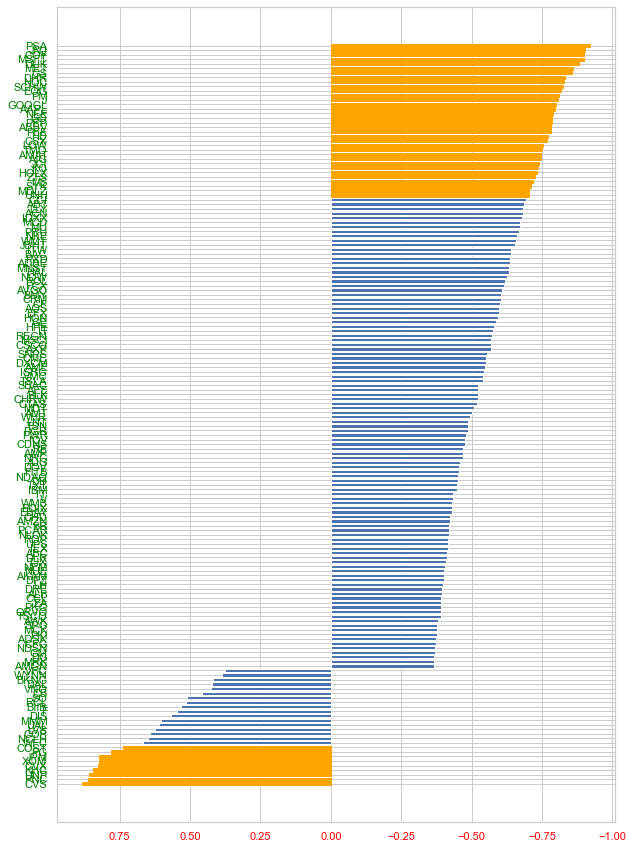

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10,15)).gca().invert_xaxis()

bars = plt.barh(total_bar_df['Symbol'], total_bar_df['Corr'], height=0.7, left=0)
plt.tick_params(axis='x', labelcolor = 'red')
plt.tick_params(axis='y', labelcolor = 'green')

# 상관계수의 절대값이 0.7 이상인 '매우 강한 유의관계를 가지는 기업'들은 orange 색깔로 표시
for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')

In [232]:
print('    |상관계수| = 상관계수에 절대값을 씌운 값', '\n')
print('*   |상관계수| < 0.5인 기업 개수 : ', total_bar_df[abs(total_bar_df['Corr']) < 0.5]['Symbol'].count(),'\n')
print('**  |상관계수| >= 0.5인 기업 개수 : ', total_bar_df[abs(total_bar_df['Corr']) >= 0.5]['Symbol'].count(),'\n')
print('*** |상관계수| >= 0.7인 기업 개수 : ', total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].count())

    |상관계수| = 상관계수에 절대값을 씌운 값 

*   |상관계수| < 0.5인 기업 개수 :  62 

**  |상관계수| >= 0.5인 기업 개수 :  102 

*** |상관계수| >= 0.7인 기업 개수 :  43


### <1차 결론> : S&P 500 기업에서 유의미한 상관계수 측정(P-value >= 0.5)이 가능한 164개 중<br><br>102개 기업은 어느 정도 상관관계가 있다고 말할 수 있으며, 그 중 43개는 매우 강한 상관관계를 가진다는 것을 발견함(2022.07.12 기준)<br><br>"S&P 500 기업 중 약 9%는 주가의 방향을 판단할 때 ESG 지표도 함께 고려해도 좋다."
>2022.04 기준 변동
>>|상관계수| >= 0.5인 기업 개수 153에서 164로 증가 (+11)
>>
>>|상관계수| >= 0.7인 기업 개수 49에서 43로 감소 (-6)

## 3. 데이터 추가 분석
### [ 강한 상관관계를 가지는 기업들은 서로 공통점이 있는가? ]
>**'산업 분류'**가 같을지 의문제기

### 3.1 위 'total_details_df' 데이터프레임에 column으로 개별 기업이 속한 **'산업 분야'**를 표에 이어 붙인 후 **scatterplot에 일단 뿌려보기**<br><br>

1. Energy(에너지) ; 석유, 가스, 석탄 연료 등 천연자원  Exxon, Shell, Chevron<br><br>

2. Materials(원자재) ; 화학, 건축자재, 금속, 광물, 목재 등 DowDuPont, Ecolab <br><br>

3. Industrials (산업재) ; 항공, 우주, 건설, 제조업, 국방 Boeing, 3M, Honeywell, UPS <br><br>

4. Consumer Discretionary (자유 소비재); 의류, 레스토랑, 자동차, 미디어, 가정용품 Amazon, Home Depot, Ford<br><br>

5. Consumer Staples (필수 소비재) ; 식품, 음료, 담배, 화장품 Walmart, Coca-Cola, Procter and Gamble<br><br>

6. Healthcare (의료, 건강); 의약품, 의료 서비스 Johnson and Johnson, Pfizer, Merck<br><br>

7. Financial (금융); 은행, 대부업 JPMorgan, Bank of America, Wells Fargo<br><br>

8. Information Technology (기술주) ; IOT, 데이터처리 Microsoft, Intel, Visa, Salesforce<br><br>

9. Communications (통신) ; 5g, 통신사업 Verizon, AT&T, Comcast <br><br>

10. Utilities (유틸리티) ; 전기, 수도 NextEra, DUK <br><br>

11. Real Estate (부동산) ; 부동산 임대사업 realty Income, pubic storage<br><br>

In [233]:
# 기업이 속한 산업분야 목록 불러오기
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

sector_dataframe = payload[0][:][['Symbol', 'GICS Sector']]
sector_dataframe.rename(columns={'GICS Sector' : 'Sector'}, inplace=True)
sector_dataframe

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
...,...,...
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials
502,ZTS,Health Care


In [234]:
total_details_addSector = pd.merge(total_details_df, sector_dataframe, how='inner', on='Symbol')

total_details_addSector['num'] = [i for i in range(1, len(total_details_df)+1)]
total_details_addSector.set_index('num', inplace=True)

total_details_addSector

,Symbol,Corr,P-value,Sector
num,,,,
1,MMM,0.602037,4.319295e-04,Industrials
2,AOS,-0.598753,4.730634e-04,Industrials
3,ABT,-0.685042,2.962923e-05,Health Care
4,ABBV,-0.782209,3.298887e-07,Health Care
...,...,...,...,...
161,WHR,-0.493148,5.622847e-03,Consumer Discretionary
162,WMB,-0.430550,1.754640e-02,Energy
163,WYNN,0.388355,3.394145e-02,Consumer Discretionary
164,ZTS,-0.724360,6.022880e-06,Health Care


<AxesSubplot:xlabel='Corr', ylabel='P-value'>

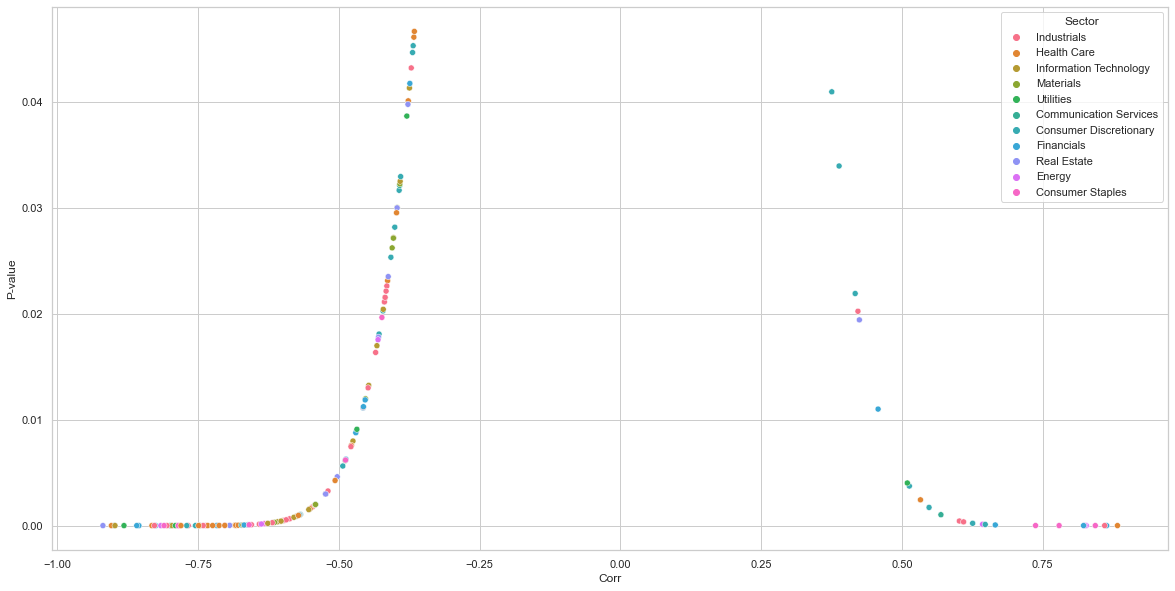

In [235]:
plt.figure(figsize=(20,10))

plt = sns.scatterplot(data=total_details_addSector, x="Corr", y="P-value", hue='Sector')

plt

In [236]:
pd.set_option('display.max_rows',13)

total_sector = total_details_addSector
total_sector['Sector'].value_counts()

Industrials               28
Health Care               26
Financials                23
Information Technology    21
Consumer Discretionary    21
Consumer Staples          11
Real Estate                9
Materials                  8
Utilities                  7
Energy                     7
Communication Services     3
Name: Sector, dtype: int64

In [267]:
pd.set_option('display.max_rows',8)
total_sector[total_sector['Corr'] <= -0.7].sort_values('Sector')
# 매우 강한 음의 상관관계를 가지는 기업

,Symbol,Corr,P-value,Sector
num,,,,
10,GOOGL,-0.799576,1.157337e-07,Communication Services
97,LOW,-0.754858,1.437166e-06,Consumer Discretionary
81,HD,-0.770330,6.406103e-07,Consumer Discretionary
105,MDLZ,-0.703024,1.475390e-05,Consumer Staples
...,...,...,...,...
21,AAPL,-0.796378,1.414086e-07,Information Technology
130,PSA,-0.919194,7.521589e-13,Real Estate
111,NEE,-0.790473,2.028600e-07,Utilities
59,DUK,-0.881794,1.219020e-10,Utilities


In [266]:
total_sector[(total_sector['Corr'] > -0.7) & (total_sector['Corr'] <= -0.5)].sort_values('Sector')
# 어느 정도 음의 상관관계를 가지는 기업

,Symbol,Corr,P-value,Sector
num,,,,
98,MCD,-0.673060,0.000046,Consumer Discretionary
144,TSLA,-0.541538,0.001998,Consumer Discretionary
112,NKE,-0.662178,0.000067,Consumer Discretionary
159,WMT,-0.659466,0.000074,Consumer Staples
...,...,...,...,...
15,AMT,-0.503006,0.004609,Real Estate
138,SBAC,-0.523670,0.002979,Real Estate
48,CCI,-0.694094,0.000021,Real Estate
12,AEE,-0.523523,0.002989,Utilities


In [239]:
len(total_sector[(total_sector['Corr'] >= 0.5) & (total_sector['Corr'] < 0.7)].sort_values('Sector'))
# 어느 정도 양의 상관관계를 가지는 기업

11

In [240]:
len(total_sector[total_sector['Corr'] >= 0.7].sort_values('Sector'))
# 강한 양의 상관관계를 가지는 기업

9

In [241]:
len(total_sector[(total_sector['Corr'] > -0.5) & (total_sector['Corr'] < 0.5)].sort_values('Sector'))
# 유의미한 상관관계가 없는 기업

62

### 3.2 '산업 분류'라는 지표 하나만으로는 유의미한 분석이 안 되겠다. 그럼 '시가총액'이 큰 기업들이 상관관계가 높을까?

- 시가총액 불러오기<br><br>
- 기업별 시가총액 차이 bar plot으로 확인해보기<br><br>
- 범위가 [-1, 1]인 Corr과 같이 차트에 놓고 보기에, 시가총액 차이가 너무 커서 구분이 힘들다면 **scaling** 해주기(MinMaxScaler())<br><br>
- 앞선 'total_sector' 데이터프레임에 시가총액(marketCap)을 이어붙이기


In [ ]:
# 선발되었던 기업들의 시가총액을 total_sector에 합치기
import pandas_datareader as web
from pandas_datareader import data

tickers = total_sector['Symbol']
marketData_list = []

for ticker in tickers:
    print(ticker)
    try: 
        marketData_list.append(web.get_quote_yahoo(ticker)['marketCap'])
    except:
        print('Error with: ', ticker)
                
# 시가총액에 대해 루트를 씌워서 비교 후 log를 씌워서 비교해보려 함
df3 = pd.concat(marketData_list, axis=0)
df4 = pd.DataFrame(df3).reset_index()
df4['rooted'] = np.sqrt(df4['marketCap'])
df4['logged'] = np.log(df4['marketCap'])

marketData_df = df4

In [244]:
marketData_df

,index,marketCap,rooted,logged
0,MMM,73249275904,270646.034340,25.017134
1,AOS,8887719936,94274.704646,22.907936
2,ABT,191307710464,437387.368889,25.977149
3,ABBV,270102773760,519714.126958,26.322068
...,...,...,...,...
160,WHR,9037907968,95067.912400,22.924694
161,WMB,38148071424,195315.312825,24.364741
162,WYNN,6547383808,80915.905779,22.602331
163,ZTS,83762544640,289417.595595,25.151252


### 3.3 기업 간 시가총액 비교

<BarContainer object of 164 artists>

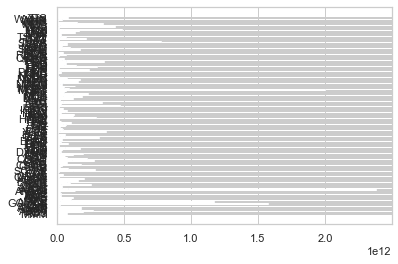

In [245]:
import matplotlib.pyplot as plt

plt.barh(marketData_df['index'],marketData_df['marketCap'])


### 3.4 각 기업 간 시가총액의 차이를 효율적으로 보기 위해 시가총액(MarketCap)을 MinMaxScaler로 Scailing하여 자료 정리

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer 

ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['marketCap', 'rooted','logged'])
    ], remainder='passthrough')
ct_dataframe = pd.DataFrame(ct.fit_transform(marketData_df), columns=['Marketcap','Rooted','Logged','Symbol'])

<BarContainer object of 164 artists>

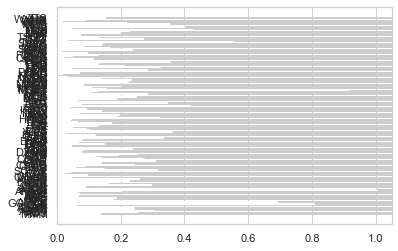

In [246]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Rooted'])

<BarContainer object of 164 artists>

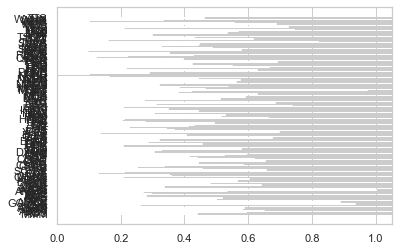

In [221]:
plt.barh(ct_dataframe['Symbol'],ct_dataframe['Logged'])

In [247]:
total_marketCap = pd.merge(total_sector, ct_dataframe, how='inner', on=None)

In [249]:
total_marketCap = total_marketCap.sort_values('Corr', ascending=True)
total_marketCap  # 최종 데이터 모습

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
129,PSA,-0.919194,7.521589e-13,Real Estate,0.021372,0.112861,0.394018
90,JNJ,-0.904156,7.461293e-12,Health Care,0.195489,0.417748,0.738054
33,COF,-0.898862,1.531517e-11,Financials,0.01594,0.093064,0.351422
103,MSFT,-0.897713,1.780868e-11,Information Technology,0.84083,0.913234,0.972098
...,...,...,...,...,...,...,...
93,KHC,0.843406,4.878522e-09,Consumer Staples,0.01774,0.099923,0.366824
150,UNP,0.860034,1.128738e-09,Industrials,0.053416,0.199153,0.533139
125,PNC,0.863566,8.074444e-10,Financials,0.026068,0.128182,0.423511
49,CVS,0.882815,1.086757e-10,Health Care,0.049964,0.191363,0.522773


### 3.5 Corr이 1 또는 -1에 가까워질 때 시가총액이 커지는 모습이 나오는가?

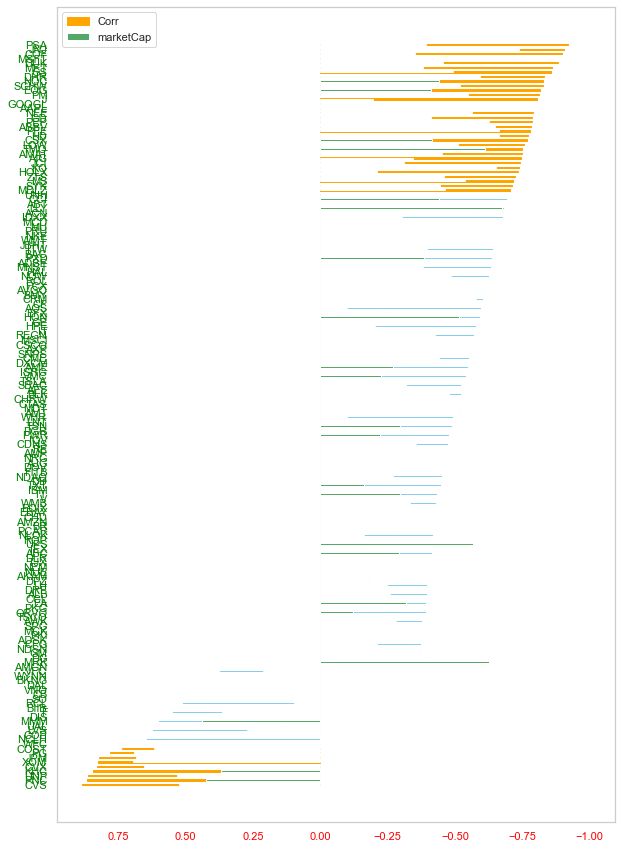

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15)).gca().invert_xaxis()

# [3/3 단계] 차트 좌우 맞추기 위한 작업
total_bar_df2= total_marketCap.sort_values(by='Corr', ascending=False).reset_index(drop=True)
(total_bar_df2[total_bar_df2['Corr'] < 0]['Marketcap']) *= -1

tempbar = total_bar_df2.copy()

# [1/3 단계] 먼저 'Corr'에 대한 bar chart 표현
bars = plt.barh(tempbar['Symbol'], total_bar_df2['Corr'], height=0.3, left=0, color='skyblue', label='Corr')
for i in total_bar_df[abs(total_bar_df['Corr']) >= 0.7]['Symbol'].index:
    bars[i].set_color('orange')

# [2/3 단계] 두번째로 'marketCap'에 대한 bar chart 표현

for item,row in total_bar_df2.iterrows() :
    if row['Corr'] < 0 : 
        tempbar.loc[tempbar['Symbol'] == row['Symbol'],'Logged'] *= -1
    
bars = plt.barh(tempbar['Symbol'], tempbar['Logged'], height=0.25, left=0, color='g', label='marketCap')

plt.tick_params(axis='x', labelcolor = 'red')
plt.tick_params(axis='y', labelcolor = 'green')

plt.grid(False)
plt.legend()

### 3.6 각 산업별로 나눈 후, '상관관계의 깊음 정도'가 '시가총액의 크기'에 비례하는지를 보고자 함.

In [282]:
sectors = total_marketCap['Sector'].value_counts().index
sectors

Index(['Industrials', 'Health Care', 'Financials', 'Information Technology',
       'Consumer Discretionary', 'Consumer Staples', 'Real Estate',
       'Materials', 'Utilities', 'Energy', 'Communication Services'],
      dtype='object')

In [286]:
total_marketCap['Corr']

129   -0.919194
90    -0.904156
33    -0.898862
103   -0.897713
         ...   
93     0.843406
150    0.860034
125    0.863566
49     0.882815
Name: Corr, Length: 164, dtype: float64

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


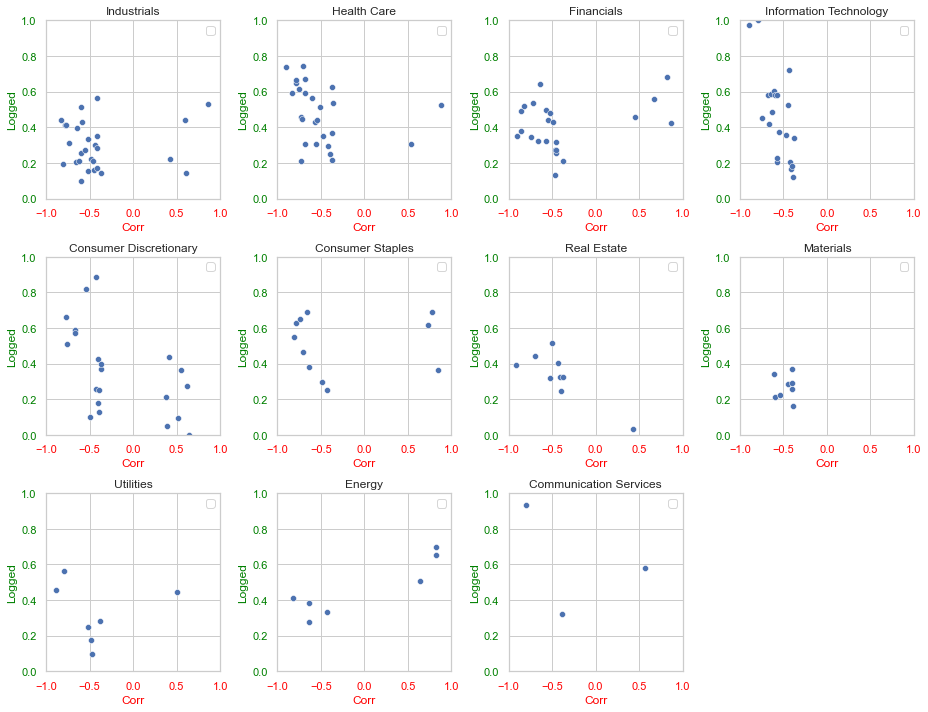

In [290]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

for i, sector in enumerate(sectors):
    plt.subplot(3, 4, i+1)
    plt.title(sector)
    plt.xlim(-1,1)
    plt.ylim(0,1)
    plt.xlabel('Corr', color='red')
    plt.ylabel('Logged', color='green')
    plt.legend(loc='best')
    sns.scatterplot(total_marketCap[total_marketCap['Sector'] == sector]['Corr'], total_marketCap[total_marketCap['Sector'] == sector]['Logged'])
    plt.tick_params(axis='x', labelcolor = 'red')
    plt.tick_params(axis='y', labelcolor = 'green')

fig.tight_layout()

### <2차 결론> S&P 500 기업 중 유의미한 상관계수를 가지는 기업은 164개가 있었고,<br><br> 그 중 유의미한 상관관계를 가지는 기업은 102개였으며, 강한 상관관계를 가지는 기업은 43개가 있다.<br><br>

2022.04 기준 변동
> 2022.04 조사 결과
>> - 그 49개 기업 중에서 'IT'와 'HealthCare' 에 속하는 기업들은 '상관관계의 깊음 정도'와 '시가총액의 규모'가 비례관계에 있음을 확인하였음.
>> - 즉, 해당 섹터 내 기업들은 규모가 클수록 'ESG 지표와 주가 간 상관관계'가 매우 깊어지는 형태를 볼 수 있음
>> - 음의 상관관계 : COF, PSA, MSFT, GS, JNJ, LLY, FB, DUK, DHR, AVGO, SCHW, MET, NEEM, CSXM, GOOGL<br><br>
>> - 양의 상관관계 : JPM, PNC, UNP, CVS, KHC, XOM 등
>
> 2022.07 조사 결과
>> 1차 해석의 전환
>>> - 0을 기준으로 좌로 가거나 우로 가거나 둘 다 Corr이 깊어지는 수치임. 그에 따라 좌,우(-1, 1) 양 방향에 대해 Y축('Logged')과의 비례관계를 판단할 수 있음
>>> <br><br>
>>> - 다시 말해, 0을 기준으로 반을 나누어 x축에서 -1로 갈 때나 1로 갈 때나 y축(시가총액)이 높아지면 그에 대해 '상관관계의 깊음 정도'와 '시가총액의 규모'는 비례 관계에 있다고 말할 수 있음
>>> <br><br>
>>> - 따라서 x축 'Corr'에 대해 절댓값을 취한 후 다시 scattor plot을 보고 해석하고자 함

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


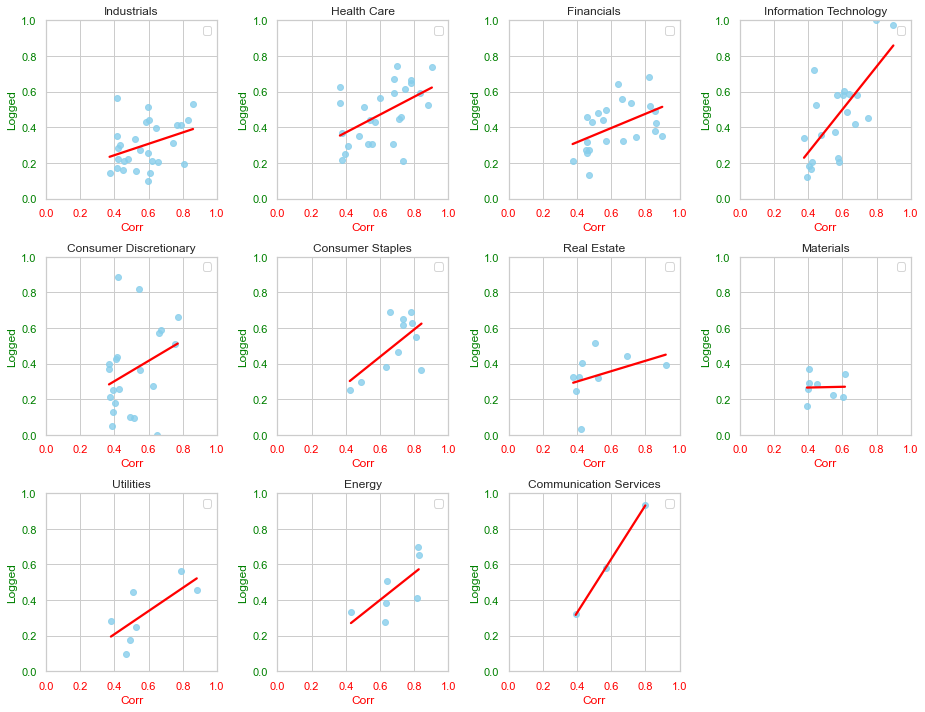

In [334]:
import matplotlib.pyplot as plt

# 'Corr'을 절대값을 통해 모드 양수로 바꿔준 dataframe 생성
total_marketCap_abs = total_marketCap.copy()
total_marketCap_abs['Corr'] = total_marketCap['Corr'].abs()
total_marketCap_abs

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

for i, sector in enumerate(sectors):
    plt.subplot(3, 4, i+1)
    plt.title(sector)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('Corr', color='red')
    plt.ylabel('Logged', color='green')
    plt.legend(loc='best')
    #sns.scatterplot(abs(total_marketCap[total_marketCap['Sector'] == sector]['Corr']), total_marketCap[total_marketCap['Sector'] == sector]['Logged'])
    plt.tick_params(axis='x', labelcolor = 'red')
    plt.tick_params(axis='y', labelcolor = 'green')
    sns.regplot(x='Corr', y='Logged', ci=None, data = total_marketCap_abs[total_marketCap_abs['Sector']==sector], line_kws={'color': 'red'}, scatter_kws={'color': 'skyblue'})

fig.tight_layout()

>> 2차 해석의 전환
>>> '상관관계의 깊음 정도'와 '시가총액 규모'의 상관관계를 보고자 할 때 거의 모든 sector 부문에서 비례관계가 보이나<br><br> 궁극적으로 파악하여 활용해보고자 하는 것은 '바람직하다'고 할 수 있는 'Corr' <0 인 기업에 대해 파악하는 것이기 때문에<br><br> 위의 작업 결과는 보류하고 다시 아래와 같이 돌아가기로 한다.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


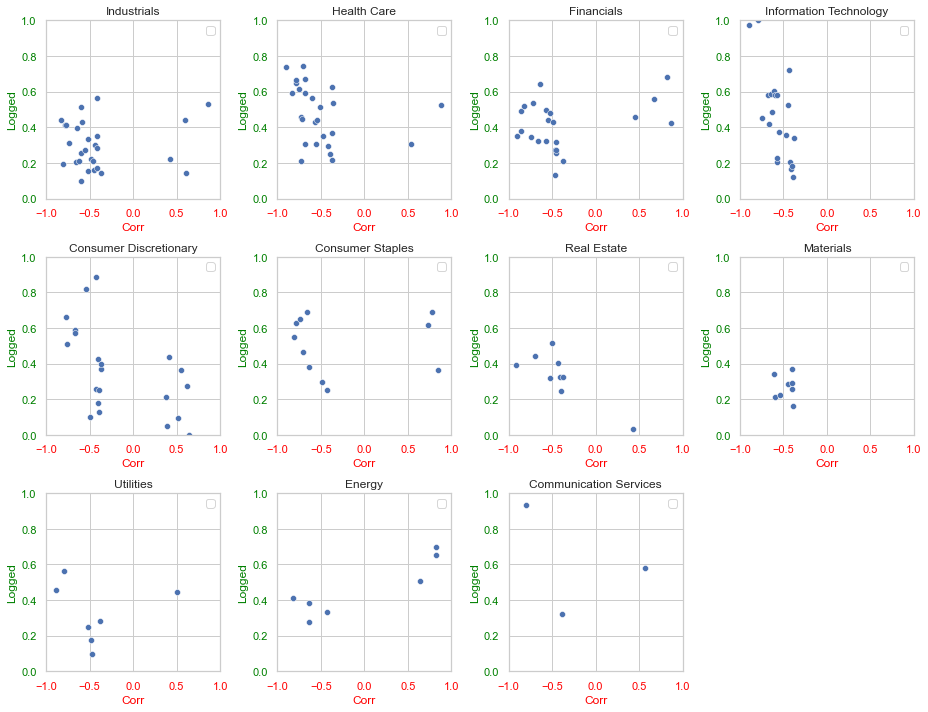

In [335]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

for i, sector in enumerate(sectors):
    plt.subplot(3, 4, i+1)
    plt.title(sector)
    plt.xlim(-1,1)
    plt.ylim(0,1)
    plt.xlabel('Corr', color='red')
    plt.ylabel('Logged', color='green')
    plt.legend(loc='best')
    sns.scatterplot(total_marketCap[total_marketCap['Sector'] == sector]['Corr'], total_marketCap[total_marketCap['Sector'] == sector]['Logged'])
    plt.tick_params(axis='x', labelcolor = 'red')
    plt.tick_params(axis='y', labelcolor = 'green')

fig.tight_layout()

### 결과 해석

>  위 결과, 여전히 IT 기업은 'Corr'과 '시가총액의 규모'간에 충분한 상관관계를 보여주나, Health Care의 경우 우측(Corr>0)에 데이터가 하나 더 생김으로 인해 우측 두 기업에 대한 개별적 조사가 필요하다. 그리고 추가적으로, Real Estate 부문에서는 이전과 다르게 한 점으로 밀집되는 형태를 보임
>
><br>
>  따라서 S&P500 기업 중 주가와 ESG 점수 간 유의미한(P-value>0.05) 상관관계를 보이는 IT 분야 기업들에 한해서는 그 상관관계의 깊음 정도와 시가총액 규모가 비례한다는 결론을 도출해낼 수 있었음. IT 분야 기업들에 대해 이와 같은 결과가 나오는 요인은 무엇이고, 다른 섹터와는 어떤 차이가 있는지 추가적으로 분석이 필요해보임.

#### 부록)  기본적으로 주가와 ESG 지표가 매우 강한 상관관계를 가지는 기업 목록

In [338]:
pd.set_option('display.max_rows', None)
total_marketCap[abs(total_marketCap['Corr']) > 0.7].sort_values(by='Corr')

,Symbol,Corr,P-value,Sector,Marketcap,Rooted,Logged
129,PSA,-0.919194,7.521589e-13,Real Estate,0.021372,0.112861,0.394018
90,JNJ,-0.904156,7.461293e-12,Health Care,0.195489,0.417748,0.738054
33,COF,-0.898862,1.531517e-11,Financials,0.01594,0.093064,0.351422
103,MSFT,-0.897713,1.780868e-11,Information Technology,0.84083,0.913234,0.972098
58,DUK,-0.881794,1.219020e-10,Utilities,0.032298,0.146648,0.455809
101,MET,-0.859102,1.231208e-09,Financials,0.01941,0.106006,0.379896
76,GS,-0.855275,1.747892e-09,Financials,0.040837,0.169418,0.491639
50,DHR,-0.832208,1.192595e-08,Health Care,0.078711,0.250077,0.593759
113,NOC,-0.827728,1.674664e-08,Industrials,0.029409,0.138316,0.441634
36,SCHW,-0.825398,1.990547e-08,Financials,0.049354,0.189958,0.520867


### 번외) 위 IT 및 HealthCare 그룹에 속한 기업들은 각 산업별로 주가가 같은 방향으로 움직일까?

- 다음은 위의 IT 기업들 간 서로 주가 흐름이 얼마나 같은 방향을 띄는지 상관관계에 따라 Heatmap을 구한 것이다. 색깔이 옅을수록 그 관계는 깊다

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:>

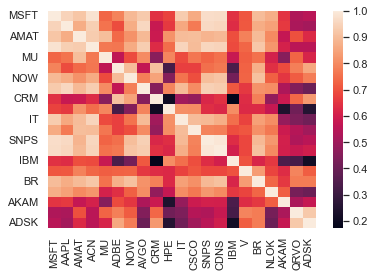

In [339]:
new_symbols_list = total_marketCap[total_marketCap['Sector'] == 'Information Technology']['Symbol'].tolist()

prices_each = []
symbol_list_last=[]
count=0

for symbol in new_symbols_list:
    price_data = yfinance.download([symbol], start = '2019-12-01' )
    price_list = price_data['Adj Close'].values.tolist()
    
    prices_each.append(price_list)
    symbol_list_last.append(symbol)
    
price_table = pd.DataFrame(prices_each)
price_table = price_table.T
price_table.columns = symbol_list_last

sns.heatmap(price_table.corr())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

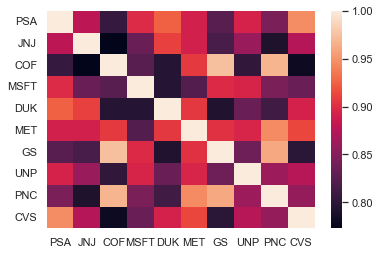

In [341]:
new_symbols_list = total_marketCap[abs(total_marketCap['Corr']) > 0.85]['Symbol'].tolist()

prices_each = []
symbol_list_last=[]
count=0

for symbol in new_symbols_list:
    price_data = yfinance.download([symbol], start = '2019-12-01' )
    price_list = price_data['Adj Close'].values.tolist()
    
    prices_each.append(price_list)
    symbol_list_last.append(symbol)
    
price_table = pd.DataFrame(prices_each)
price_table = price_table.T
price_table.columns = symbol_list_last

sns.heatmap(price_table.corr())


# 프로젝트를 하면서 느낀 점

### <1차 분석(2022.04)>
####  1. 열심히 기획을 한 부분을 Scatter Plot으로 뿌렸을 때 원했던 방향으로 자꾸 해석하려 했다는 점에 대해 '데이터를 원하는 방향으로 보려고 하지 마라'는 멘토님의 조언이 굉장히 인상깊었다.<br>
#### 2. 원하는 방향이 나오지 않아 낙심했던 부분에 있어서도 '그것마저도 유의미한 결과가 될 수 있다'는 점을 새로 배웠고 앞으로 데이터를 바라보는 자세에 있어 큰 깨달음을 얻었다<br><br>

### <2차 분석(2022.07)>
#### 1. 앞선 1차 분석 때와의 결과와 비교할 수 있게 되었다는 점이 너무 흥미로웠다.<br>
#### 2. 3개월 내 어떤 종목들이 S&P 500 리스트에 편입 및 퇴출되었는지 확인이 필요하다.<br>
#### 3. 최근 글로벌 주가 폭락 및 경기침체로 인해 데이터에 큰 변동이 생길 것을 염려했으나 전혀 문제없었다.<br>
#### 4. 1차 분석 결과와 2차 분석 결과를 비교하며 특정 기업들에 대한 공통점이 있는지 추후 분석을 해야겠다.
